# Lekce 3

## Práce s datem a časem

Dnes budeme pracovat se soubory [invoices.csv](invoices.csv), [invoices_2.csv](invoices_2.csv) a [signal_monitoring.csv](signal_monitoring.csv).

Zkusme si načíst následující tabulku.

In [1]:
import pandas

invoices = pandas.read_csv("invoices.csv")
invoices.head()

invoice_date                       customer    amount
0  24. 07. 2021                 Robbins-Bryant  42424.49
1  03. 06. 2021   Little, Espinoza and Manning   6269.53
2  24. 06. 2021                 Hartman-Garcia  19182.55
3  09. 08. 2021  Mason, Armstrong and Whitaker  66295.23
4  29. 06. 2021          Dickerson-Blankenship  88592.58

Podívejme se nyní na to, jaké datové typy mají jednotlivé sloupce.

In [2]:
invoices.dtypes

invoice_date     object
customer         object
amount          float64
dtype: object

První dva sloupce mají obecný typ `object`, `pandas` tedy nerozpoznal, že v prvním sloupci je datum. To je škoda, protože nám to neumožní s datem pracovat. Můžeme ale hodnotu na typ `datetime` převést. K převodu použijeme funkci `to_datetime`, které předáme sloupec `invoice_date` a výstup uložíme do sloupce `invoice_date_converted`.

In [3]:
invoices["invoice_date_converted"] = pandas.to_datetime(invoices["invoice_date"])
invoices.head()

C:\Users\jirip\AppData\Local\Temp\ipykernel_17604\466789594.py:1: UserWarning: Parsing dates in %d. %m. %Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  invoices["invoice_date_converted"] = pandas.to_datetime(invoices["invoice_date"])


invoice_date                       customer    amount   
0  24. 07. 2021                 Robbins-Bryant  42424.49  \
1  03. 06. 2021   Little, Espinoza and Manning   6269.53   
2  24. 06. 2021                 Hartman-Garcia  19182.55   
3  09. 08. 2021  Mason, Armstrong and Whitaker  66295.23   
4  29. 06. 2021          Dickerson-Blankenship  88592.58   

  invoice_date_converted  
0             2021-07-24  
1             2021-06-03  
2             2021-06-24  
3             2021-08-09  
4             2021-06-29

Překvapivé je, že si pandas s českým formátem poradil. Resp. se to tak zdá. Pokud si ale sloupce pečlivě porovnáme, zjistíme, že v případě řádku 1 byl 3. červen transformován na 6. březen.

Pandas totiž předpokládá **americký styl zápisu**, který má (z nepochopitelných důvodů) na prvním místě měsíc a na druhém místě den. Není však dogmatický a u 2 řádku pochopil, že 27 číslo měsíce není a datum převede správně. Již mu ale nedojde, že by mohl stejným stylem převést ostatní data (a ostatně ani není zaručeno, že všechna data musí mít stejný formát).

První možností, jak si s tím poradit, je nastavení parametru `dayfirst`, kterým říkáme, že číslo jde je před číslem měsíce. Je zřejmé, že výchozí hodnota parametru je `False`.

In [4]:
invoices["invoice_date_converted"] = pandas.to_datetime(invoices["invoice_date"], dayfirst=True)
invoices.head()

invoice_date                       customer    amount   
0  24. 07. 2021                 Robbins-Bryant  42424.49  \
1  03. 06. 2021   Little, Espinoza and Manning   6269.53   
2  24. 06. 2021                 Hartman-Garcia  19182.55   
3  09. 08. 2021  Mason, Armstrong and Whitaker  66295.23   
4  29. 06. 2021          Dickerson-Blankenship  88592.58   

  invoice_date_converted  
0             2021-07-24  
1             2021-06-03  
2             2021-06-24  
3             2021-08-09  
4             2021-06-29

## Přičítání a porovnávání

Každá faktura má nějaký datum splatnosti. Nyní chceme přidat sloupec s datem splatnosti s tím, že datum splatnosti je vždy 60 dní po vystavení faktury. K tomu využijeme třídu `Timedelta` modulu `pandas`.

Třída umožňuje poměrně jednoduché vytvoření hodnoty zápisem `"60 days"` coby řetězce. Alternativně můžeme použít [ISO normu](https://en.wikipedia.org/wiki/ISO_8601#Durations) pro zápis délky trvání a zapsat "P60D".

In [5]:
invoices["due_date"] = invoices["invoice_date_converted"] + pandas.Timedelta("P60D")
invoices.head()

invoice_date                       customer    amount   
0  24. 07. 2021                 Robbins-Bryant  42424.49  \
1  03. 06. 2021   Little, Espinoza and Manning   6269.53   
2  24. 06. 2021                 Hartman-Garcia  19182.55   
3  09. 08. 2021  Mason, Armstrong and Whitaker  66295.23   
4  29. 06. 2021          Dickerson-Blankenship  88592.58   

  invoice_date_converted   due_date  
0             2021-07-24 2021-09-22  
1             2021-06-03 2021-08-02  
2             2021-06-24 2021-08-23  
3             2021-08-09 2021-10-08  
4             2021-06-29 2021-08-28

Pojďme nyní roztřídit faktury na ty, které jsou před splatností a ty, které jsou po splatnosti. Třídění budeme provádět k 1. září 2021. Vytvoříme tedy objekt, který reprezentuje toto datum (využijeme standardní modul `datetime`) a funkci `where()` z modulu `numpy`, která slouží k zápisu podmínky.

Přidáme sloupec `status`, který bude obsahovat texty `overdue` a `before due date`.

In [6]:
import numpy
import datetime
today_date = datetime.datetime(2021, 9, 1)
invoices["status"] = numpy.where(invoices["due_date"] < today_date, "overdue", "before due date")
invoices.head()

invoice_date                       customer    amount   
0  24. 07. 2021                 Robbins-Bryant  42424.49  \
1  03. 06. 2021   Little, Espinoza and Manning   6269.53   
2  24. 06. 2021                 Hartman-Garcia  19182.55   
3  09. 08. 2021  Mason, Armstrong and Whitaker  66295.23   
4  29. 06. 2021          Dickerson-Blankenship  88592.58   

  invoice_date_converted   due_date           status  
0             2021-07-24 2021-09-22  before due date  
1             2021-06-03 2021-08-02          overdue  
2             2021-06-24 2021-08-23          overdue  
3             2021-08-09 2021-10-08  before due date  
4             2021-06-29 2021-08-28          overdue

Nakonec můžeme spočítat, jaké finanční prostředky jsou ve fakturách před splatností a jaké prostředky v nezaplacených fakturách po splatnosti.

In [7]:
invoices.groupby("status")["amount"].sum()

status
before due date    2.383203e+09
overdue            2.604655e+09
Name: amount, dtype: float64

## Výpočty s daty

Máme-li k dispozici dva různé sloupce s daty, můžeme s nimi provádět výpočty, nejčastěji počítat rozdíl, tj. délku časového intervalu mezi nimi.

Uvažujme, že nyní máme k dispozici delší časovou řadu faktur. Nejprve spočítáme, po kolika dnech v průměru zaplatí fakturu jednotliví zákazníci. Tuto hodnotu pak použijeme k výpočtu očekávané splatnosti nových faktur.

Nejprve načteme tabulku s fakturami.

In [8]:
invoices_2 = pandas.read_csv("invoices_2.csv")
invoices_2["invoice_date"] = pandas.to_datetime(invoices_2["invoice_date"], dayfirst=True)
invoices_2.head()

invoice_date                   customer  amount  payment_date
0   2016-05-01                 Campos PLC   29366  25. 06. 2016
1   2016-05-10  Garcia, Hamilton and Carr   61145  16. 07. 2016
2   2016-05-20  Garcia, Hamilton and Carr   92659  26. 07. 2016
3   2016-05-25    Nguyen, Harrell and Lee   40076  05. 08. 2016
4   2016-06-04  Garcia, Hamilton and Carr   54854  06. 08. 2016

V první části se budeme zabývat splacenými fakturami. Splacené faktury mají prázdnou hodnotu ve sloupci `payment_date`, vyfiltrujeme je pomocí metody `dropna`. Čas, který zákazník potřeboval na splacení faktury, získáme pomocí rozdílu sloupců `payment_date` a `invoice_date`.

In [9]:
invoices_2_paid = invoices_2.dropna().reset_index(drop=True)
invoices_2_paid["payment_date"] = pandas.to_datetime(invoices_2_paid["payment_date"], dayfirst=True)
invoices_2_paid["paid_in"] = invoices_2_paid["payment_date"] - invoices_2_paid["invoice_date"]
invoices_2_paid.head()

invoice_date                   customer  amount payment_date paid_in
0   2016-05-01                 Campos PLC   29366   2016-06-25 55 days
1   2016-05-10  Garcia, Hamilton and Carr   61145   2016-07-16 67 days
2   2016-05-20  Garcia, Hamilton and Carr   92659   2016-07-26 67 days
3   2016-05-25    Nguyen, Harrell and Lee   40076   2016-08-05 72 days
4   2016-06-04  Garcia, Hamilton and Carr   54854   2016-08-06 63 days

Hodnota rozdílu je uložené jako datový typ `timedelta`.

In [10]:
invoices_2_paid.dtypes

invoice_date     datetime64[ns]
customer                 object
amount                    int64
payment_date     datetime64[ns]
paid_in         timedelta64[ns]
dtype: object

Nyní provedeme agregaci dle zákazníka a zjistíme tak průměrnou dobu splatnosti faktury.

In [11]:
average_payment_data = pandas.DataFrame(invoices_2_paid.groupby(["customer"])["paid_in"].mean())
average_payment_data.head()

paid_in
customer                                  
Archer-Patel    46 days 20:34:17.142857143
Campos PLC                60 days 00:00:00
Chang-Fisher              63 days 05:20:00
Clayton-Cook    69 days 22:09:13.846153846
Faulkner-Howard 74 days 06:32:43.636363636

### Dokončení příkladu

*Níže je dokončení příkladu, které je ale spíše opakováním (je tam agregace a propojení tabulek). Na lekci ho procházet nebudeme, ale určitě se k němu můžete vrátit v rámci čtení na doma a zopakovat si na něm věcí z kurzu Python pro data 1 i dnešní lekce.*

Nyní budeme pracovat s nesplacenými fakturami, které získáme např. dotazem s využitím metody `isna()`. Poté propojíme tabulku s nesplacenými fakturami s tabulkou průměrných splatností a přičteme průměrnou dobu splatnosti k datu vystavení faktury. Abychom získali splatnost jako den, použijeme vlastnost `dt.date`.

In [12]:
invoices_2_not_paid = invoices_2[invoices_2["payment_date"].isna()]
invoices_2_not_paid = pandas.merge(invoices_2_not_paid, average_payment_data, on=["customer"])
invoices_2_not_paid["expected_payment_date"] = invoices_2_not_paid["invoice_date"] + pandas.to_timedelta(invoices_2_not_paid["paid_in"], unit="D")
invoices_2_not_paid["expected_payment_date"] = invoices_2_not_paid["expected_payment_date"].dt.date
invoices_2_not_paid.head()

invoice_date                     customer  amount payment_date   
0   2021-07-02      Nguyen, Harrell and Lee   93301          NaN  \
1   2021-07-09                   Levy Group   43621          NaN   
2   2021-08-05                   Levy Group   39651          NaN   
3   2021-07-16                   Wagner LLC   65064          NaN   
4   2021-07-22  Jones, Jefferson and Rivera   98317          NaN   

                     paid_in expected_payment_date  
0 67 days 05:08:34.285714286            2021-09-07  
1           65 days 00:00:00            2021-09-12  
2           65 days 00:00:00            2021-10-09  
3 58 days 05:08:34.285714286            2021-09-12  
4           71 days 15:00:00            2021-10-01

## Použití metody shift

V některých případech se v datech potřebujeme podívat o řádek výše nebo níže, často to může být v souvislosti s datem a časem. Uvažujme například nějaký program, který zapisuje začátek a konec nějaké události. Událost a její typ vždy zapíše jako samostatný řádek. Abychom zjistili délku události, potřebujeme spočítat rozdíl mezi hodnotami data a času ve dvou řádích. K tomu slouží metoda `shift`.

Uvažujme například zařízení, které monitoruje výpadky televizního signálu. Zařízení zapisuje záznamy o začátku a konci výpadku do logovacího souboru.


In [13]:
signal_monitoring = pandas.read_csv("signal_monitoring.csv")
signal_monitoring["event_date_time"] = pandas.to_datetime(signal_monitoring["event_date_time"])
signal_monitoring.head()

event_type     event_date_time
0      signal lost 2021-02-03 00:40:08
1  signal restored 2021-02-03 01:14:11
2      signal lost 2021-02-05 19:14:19
3  signal restored 2021-02-05 19:46:29
4      signal lost 2021-02-06 14:31:34

Nyní použijeme metodu `shift` na sloupec `event_date_time`. Pomocí metody pak přidáme k tabulce **nový sloupec**. Nejdůležitějším parametrem metody je parametr `periods`, který může mít kladnou nebo zápornou hodnotu.

- Kladná hodnota parametru `periods` znamená, že hodnoty budou posunuty směrem dolů.
- Záporná hodnota parametru `periods` znamená, že hodnoty budou posunuty směrem nahoru.

Pro náš případ bude ideální, pokud posuneme hodnoty sloupce `event_date_time` o jeden řádek směrem nahoru. Tím zajistíme, že pokud má sloupec `event_type` hodnotu `signal lost`, uvidíme v jednom řádku začátek i konec výpadku. Tím padem bude stačit tyto hodnoty od sebe odečíst. Pro `event_type` `signal restored` nebude mít tato hodnota smysl, ale to nevadí, tyto řádky můžeme pomocí dotazu z tabulky odfiltrovat.

In [14]:
signal_monitoring["event_end_date_time"] = signal_monitoring["event_date_time"].shift(periods=-1)
signal_monitoring.head()

event_type     event_date_time event_end_date_time
0      signal lost 2021-02-03 00:40:08 2021-02-03 01:14:11
1  signal restored 2021-02-03 01:14:11 2021-02-05 19:14:19
2      signal lost 2021-02-05 19:14:19 2021-02-05 19:46:29
3  signal restored 2021-02-05 19:46:29 2021-02-06 14:31:34
4      signal lost 2021-02-06 14:31:34 2021-02-06 14:48:24

Nyní odebereme přebytečné řádky.

In [15]:
signal_monitoring = signal_monitoring[signal_monitoring["event_type"] == "signal lost"]
signal_monitoring.head()

event_type     event_date_time event_end_date_time
0  signal lost 2021-02-03 00:40:08 2021-02-03 01:14:11
2  signal lost 2021-02-05 19:14:19 2021-02-05 19:46:29
4  signal lost 2021-02-06 14:31:34 2021-02-06 14:48:24
6  signal lost 2021-02-08 04:59:20 2021-02-08 05:38:29
8  signal lost 2021-02-09 14:21:25 2021-02-09 14:42:22

Nyní můžeme snadno přidat výpočet délky výpadku signálu.

In [16]:
signal_monitoring["outage_length"] = signal_monitoring["event_end_date_time"] - signal_monitoring["event_date_time"]
signal_monitoring.head()

event_type     event_date_time event_end_date_time   outage_length
0  signal lost 2021-02-03 00:40:08 2021-02-03 01:14:11 0 days 00:34:03
2  signal lost 2021-02-05 19:14:19 2021-02-05 19:46:29 0 days 00:32:10
4  signal lost 2021-02-06 14:31:34 2021-02-06 14:48:24 0 days 00:16:50
6  signal lost 2021-02-08 04:59:20 2021-02-08 05:38:29 0 days 00:39:09
8  signal lost 2021-02-09 14:21:25 2021-02-09 14:42:22 0 days 00:20:57

Nyní můžeme například vypočítat celkovou délku výpadků signálu v jednotlivých dnech.

In [17]:
signal_monitoring_grouped = signal_monitoring.groupby(signal_monitoring["event_date_time"].dt.date)["outage_length"].sum()
signal_monitoring_grouped.head()

event_date_time
2021-02-03   0 days 00:34:03
2021-02-05   0 days 00:32:10
2021-02-06   0 days 00:16:50
2021-02-08   0 days 00:39:09
2021-02-09   0 days 00:44:38
Name: outage_length, dtype: timedelta64[ns]

Jako poslední krok si ukážeme, jak prezentovat výsledky našeho výpočtu pomocí grafu. Abychom mohli použít sloupcový graf, musíme převést typ `timedelta` na číselnou hodnotu. To zařídíme pomocí vlastnosti `dt.total_seconds`.

<Axes: xlabel='event_date_time'>

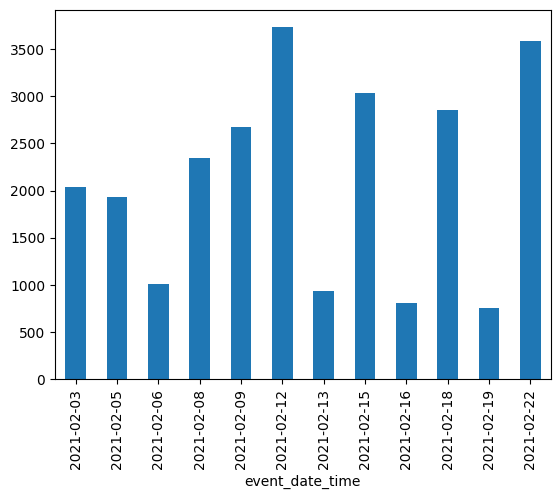

In [18]:
signal_monitoring_grouped_seconds = signal_monitoring_grouped.dt.total_seconds()
signal_monitoring_grouped_seconds.plot(kind="bar")

# Čtení na doma

## Odstraňování duplicit

Duplicitami obecně myslíme opakující se hodnoty v datech. Duplicity mohou vzniknou v důsledku chyby, například:

- program zapíše do databáze nebo do logu stejný údaj dvakrát,
- vzniknou při propojení (`merge`) tabulek.

V některých případech je duplicitní pouze část sloupc. Uvažujme data o registraci uživatelů ze souboru [user_registration.json](user_registration.json). V některých případech uživatel vyplnil registrační formulář do aplikace, ale nepotvrdil e-mailovou adresu (např. mu e-mail padl do spamu) a tak se uživatel po nějaké době zaregistroval znovu.


In [19]:
import pandas
data = pandas.read_json("user_registration.json")
data.head()

date_time                 email      ip_address age_group   
0 2021-03-01 00:02:13.920     qbichler@kabsi.at  168.155.75.206     30-44  \
1 2021-03-01 00:04:27.840  robinkolar@chello.cz  105.132.109.66     18-29   
2 2021-03-01 00:06:41.760     zvesela@chello.cz   105.46.12.139       60+   
3 2021-03-01 00:08:55.680    gmaresova@email.cz   141.22.41.210       60+   
4 2021-03-01 00:11:09.600    qkralova@seznam.cz  196.95.130.168     18-29   

         marketing_channel  
0           Social network  
1           Social network  
2   Newspapers or magazine  
3   Newspapers or magazine  
4  Friend's recommendation

Zjistíme nyní počet záznamů v souboru.

In [20]:
data["email"].unique().shape[0]

34398

Pokud budeme chtít seznam unikátních e-mailových adres, můžeme na sérii `email` aplikovat metodu `unique()`.

Pokud budeme chtít odstranit duplicitní registrace z celé tabulky, můžeme využít metodu `drop_duplicates()`. Ta odebere řádky na základě sloupců definovaých jako parametr `subset`. Pokud parametr nevyplníme, jsou použity všechny sloupce. Dále vybíráme, které řádky chceme ponechat. K tomu slouží parametr `last`. Máme tři možnosti:

- ponechat poslední řádek (`last`),
- ponechat první řádek (`first`),
- neponechat ani jeden z duplicitních řádků (`False`).

V našem případě ponecháme poslední řádek. Počet řádků v souboru nyní odpovídá počtu unikátních e-mailových adres, které jsme získali metodou `unique()`.

In [21]:
data_cleaned = data.drop_duplicates(subset="email", keep="last")
data_cleaned.shape

(34398, 5)

## Přený formát data a času

Konzervativnější přístup je ale přesná definice formáta data, který využívá stejné symboly, jako funkce `strftime` modulu `datetime`. Náš český formát bychom zapsatli jako `"%d. %m. %Y"`:

- `%d` zastupuje číslo dne,
- `%m` číslo měsíce a
- `%Y` rok.

Kompletní význam všech zástupných symbolů je stejný jako v jazyce Python a najdeme jen v [dokumentaci modulu datetime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [22]:
invoices["invoice_date_converted"] = pandas.to_datetime(invoices["invoice_date"], format="%d. %m. %Y")
invoices.head()

invoice_date                       customer    amount   
0  24. 07. 2021                 Robbins-Bryant  42424.49  \
1  03. 06. 2021   Little, Espinoza and Manning   6269.53   
2  24. 06. 2021                 Hartman-Garcia  19182.55   
3  09. 08. 2021  Mason, Armstrong and Whitaker  66295.23   
4  29. 06. 2021          Dickerson-Blankenship  88592.58   

  invoice_date_converted   due_date           status  
0             2021-07-24 2021-09-22  before due date  
1             2021-06-03 2021-08-02          overdue  
2             2021-06-24 2021-08-23          overdue  
3             2021-08-09 2021-10-08  before due date  
4             2021-06-29 2021-08-28          overdue

Funkce `to_datetime` tiše dělá ještě jednu chytrou věc. Převod data z řetězce totiž není úplně jednoduchá záležitost a i když ji moderní počítač zvládne velmi rychle, stále platí pravidlo, že tisíckrát nic umořilo osla. Pokud by tedy `pandas` převáděl každý řetězec, operace by trvala dlouho.

Funkce `to_datetime` na to ale jde chytřeji a používá vyrovnávají paměť nebo-li `cache`. Každý převedený řetězec si uloží a předtím, že se pustí do pracného převodu u nového řádku, zkontroluje, zda již takový řetězec nepřeváděl. To je pro náš případ, kdy máme hodně dat v omezeném období ideální. Abychom si vyzkoušeli, jak dlouho by převod trval bez cache, nastavíme parametr `cache` na `False`.

In [23]:
invoices["invoice_date_converted"] = pandas.to_datetime(invoices["invoice_date"], format="%d. %m. %Y", cache=False)
invoices.head()

invoice_date                       customer    amount   
0  24. 07. 2021                 Robbins-Bryant  42424.49  \
1  03. 06. 2021   Little, Espinoza and Manning   6269.53   
2  24. 06. 2021                 Hartman-Garcia  19182.55   
3  09. 08. 2021  Mason, Armstrong and Whitaker  66295.23   
4  29. 06. 2021          Dickerson-Blankenship  88592.58   

  invoice_date_converted   due_date           status  
0             2021-07-24 2021-09-22  before due date  
1             2021-06-03 2021-08-02          overdue  
2             2021-06-24 2021-08-23          overdue  
3             2021-08-09 2021-10-08  before due date  
4             2021-06-29 2021-08-28          overdue

Vidíme, že převod trvá řádově déle, využití vyrovnávací paměti se tedy vyplatí. Pokud bychom např. převáděli 10 milionů záznamů, budou časy převodů (na bězném PC) cca 2 a 20 sekund.

# Cvičení

## Závod

Uvažuj časy závodníků za ročníky půlmaratonu 2019 a 2020, které jsou uloženy v souboru [half_marathon.csv](half_marathon.csv). V souboru jsou uloženy pouze časy závodníků, které se zúčastnili obou závodů. V souboru je uloženo jméno závodníka, jeho čas a rok závodu, ke kterému se čas vztahuje. Tvým úkolem je spočítat, o kolik se změnil průměrný čas závodníků a zda se v průměru zlepšili či zhoršili (například protože kvůli lockdownům méně či více trénovali).

Můžeš využít následující postup:

- Seřaď si data (je třeba seřadit data dle jména závodníka i dle roku závodu).
- Převeď sloupec s časem závodníka na typ `datetime`. Můžeš využít stejný postup, jaký jsme si ukázali v lekci. Protože jde pouze o časový údaj, pandas k němu připojí dnešní datum, aby byly ve sloupci datum i čas. Toho si ale nevšímej, u obou sloupců je datum stejný, takže na porovnání údajů to nebude mít vliv.
- Pomocí metody `shift()` si dej na jeden řádek výsledky obou závodů. Je nutné ji použít v kombinaci s metodou `groupby()`, jak je vidět níže. Je třeba nahradit `X` vhodně zvoleným číslem.

```py
df_joined["Cas zavodnika 2020"] = df_joined.groupby("Jmeno")["Cas zavodnika"].shift(X)
```

- Vyřaď z tabulky neúplné řádky pomocí metody `dropna()`.
- Vypočítej rozdíl mezi časy závodníka a převeď ho na sekundy (postup jsme si ukazovali v lekci). Dále spočítej průměrnou změnu. Vyšlo i kladné nebo záporné číslo? A co to znamená.

Řešení příkladu je [zde](reseni.ipynb).

## Nápověda
Po převodu na typ na `datetime` a použití metody `shift()` se dostaneš k výsledku níže. Tento výsledek byl získaný s parametrem -1, tj. hodnoty byly posunuty směrem nahoru. V řádku, kde byl původně čas z roku 2019, uvidíš nyní nově čas z roku 2020, který se posunul nahoru.

In [4]:
import pandas
df = pandas.read_csv("half_marathon_hint_1.csv")
df.head()

Jmeno        Cas zavodnika  Rok zavodu   Cas zavodnika 2020
0  Adamcová Helena  2023-04-20 01:46:07        2019                  NaN
1   Aster Vladimír  2023-04-20 01:53:25        2019  2023-04-20 02:00:19
2   Aster Vladimír  2023-04-20 02:00:19        2020                  NaN
3    Asterová Jana  2023-04-20 02:16:59        2019  2023-04-20 02:30:01
4    Asterová Jana  2023-04-20 02:30:01        2020                  NaN

Po vypočtení rozdílu by se měl objevit nový sloupec. Znaménko se může lišit, záleží na tom, v jakém pořadí byly sloupce zadány při výpočtu rozdílu.

In [6]:
df = pandas.read_csv("half_marathon_hint_2.csv")
df.head()

Jmeno        Cas zavodnika  Rok zavodu   Cas zavodnika 2020   
0      Aster Vladimír  2023-04-20 01:53:25        2019  2023-04-20 02:00:19  \
1       Asterová Jana  2023-04-20 02:16:59        2019  2023-04-20 02:30:01   
2       Baborová Anna  2023-04-20 01:58:20        2019  2023-04-20 01:52:25   
3          Bambas Jan  2023-04-20 02:02:59        2019  2023-04-20 02:35:39   
4  Barochovská Andrea  2023-04-20 03:01:25        2019  2023-04-20 02:50:05   

               Zmena  
0    0 days 00:06:54  
1    0 days 00:13:02  
2  -1 days +23:54:05  
3    0 days 00:32:40  
4  -1 days +23:48:40

A po převodu na sekundy by se měly objevit podobné hodnoty jako níže. Pořád platí, že znaménko se může změnit. Doporučuji se vždy podívat na sloupce s časy v obou letech, kde je lépe vidět, jestli se člověk zlepšil nebo zhoršil. Poté je snazší si uvědomit, jestli kladné číslo znamené zlepšení či zhoršení. Zde znamená zhoršení.

In [7]:
df = pandas.read_csv("half_marathon_hint_3.csv")
df.head()

Jmeno        Cas zavodnika  Rok zavodu   Cas zavodnika 2020   
0      Aster Vladimír  2023-04-20 01:53:25        2019  2023-04-20 02:00:19  \
1       Asterová Jana  2023-04-20 02:16:59        2019  2023-04-20 02:30:01   
2       Baborová Anna  2023-04-20 01:58:20        2019  2023-04-20 01:52:25   
3          Bambas Jan  2023-04-20 02:02:59        2019  2023-04-20 02:35:39   
4  Barochovská Andrea  2023-04-20 03:01:25        2019  2023-04-20 02:50:05   

    Zmena  
0   414.0  
1   782.0  
2  -355.0  
3  1960.0  
4  -680.0

### Výsledek

Mělo by ti vyjít, že průměrná změna je asi 584 sekund. To, jestli je číslo kladné nebo záporné záleží na výpočtu rozdílu. Při výpočtu `df["Cas zavodnika 2020"] - df["Cas zavodnika"]` by číslo mělo být kladné a znamená zhoršení (v roce 2020 závodníci běželi déle, čili se zhoršili). Při výpočtu `df["Cas zavodnika"] - df["Cas zavodnika 2020"]` pak vyjde rozdíl záporný (v roce 2019 běželi závodníci kratší čas, proto došlo ke zhoršení).

### Bonus

- Rozděl pomocí funkce `cut()` závodníky na ty, kteří se zlepšili a ty, kteří se zhoršili. Jako hranice můžeš využít "mínus nekonečno" (`float("-inf")`) a "plus nekonečno" (`float("inf")`). Dále pomocí agregace zjisti počty závodníků, kteří se zlepšili a kteří se naopak zhoršili